<a href="https://colab.research.google.com/github/johntanas/it1244project/blob/main/code/model_copied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
path_to_evm_label="/content/expo_moving_k2_labels.csv"
path_to_app="/content/cleaned_application.csv"
cleaned_app_df=pd.read_csv(path_to_app,index_col=0)
ewm_df_status=pd.read_csv(path_to_evm_label,index_col=0)

In [4]:
labels_to_int_evm={"bad":0,"good":1}

In [5]:
ewm_df=ewm_df_status.drop(columns="status").replace({"label":labels_to_int_evm})

In [6]:
dep_var="label"
random_state=42

In [7]:
from sklearn.model_selection import ShuffleSplit
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from fastai.tabular.all import *
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [8]:
train_df=ewm_df.merge(cleaned_app_df,how="inner",on="id").drop("id",axis=1)

In [9]:
cont,cat = cont_cat_split(train_df, max_card=1, dep_var=dep_var)

In [10]:
sss = ShuffleSplit(n_splits=1, test_size=0.2)
train_idx, valid_idx = next(sss.split(train_df))
splits = (list(train_idx),list(valid_idx))

In [11]:
procs = [Categorify, Normalize]
to = TabularPandas(train_df, procs, cat, cont,
                      splits=splits, y_names=dep_var)

In [12]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

https://www.kaggle.com/code/umerkk12/credit-card-predictive-analysis#there-are-9516-rows.

In [14]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(xs, y)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [18]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier()
}

In [30]:
int_to_labels_evm={"bad":1,"good":2}

Model LogisticRegression
              precision    recall  f1-score   support

           0       0.24      0.41      0.30       395
           1       0.73      0.55      0.63      1118

    accuracy                           0.51      1513
   macro avg       0.48      0.48      0.47      1513
weighted avg       0.60      0.51      0.54      1513

Model KNeighbors
              precision    recall  f1-score   support

           0       0.24      0.40      0.30       395
           1       0.72      0.55      0.63      1118

    accuracy                           0.51      1513
   macro avg       0.48      0.48      0.47      1513
weighted avg       0.60      0.51      0.54      1513

Model SVC
              precision    recall  f1-score   support

           0       0.24      0.43      0.31       395
           1       0.72      0.53      0.61      1118

    accuracy                           0.50      1513
   macro avg       0.48      0.48      0.46      1513
weighted avg       0.6

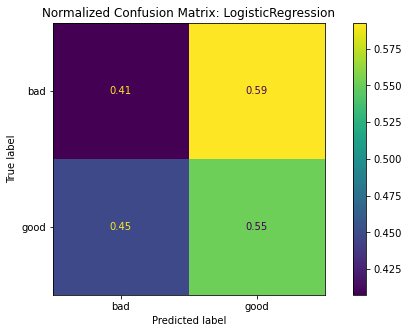

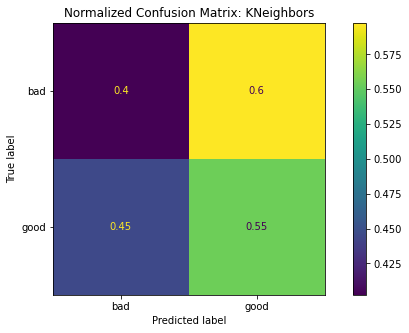

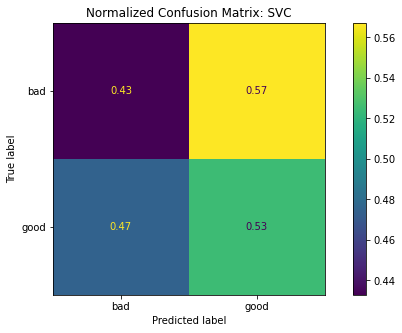

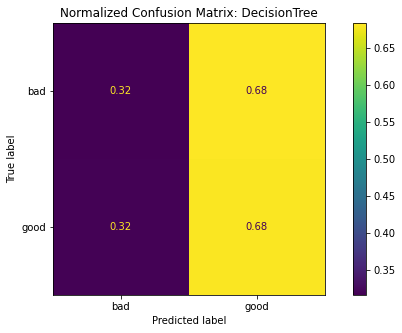

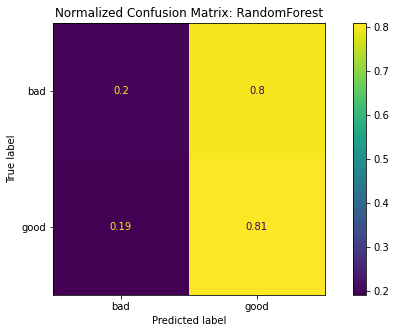

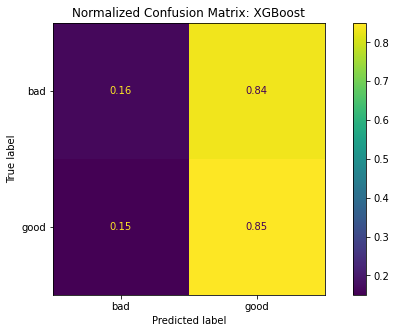

In [35]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_balanced, y_balanced)
    prediction = classifier.predict(valid_xs)
    print("Model "+key)
    print(classification_report(valid_y, prediction))
    disp=ConfusionMatrixDisplay.from_predictions(valid_y,prediction,display_labels=int_to_labels_evm,normalize = 'true')
    plt.title(f"Normalized Confusion Matrix: {key}")
    fig=disp.ax_.get_figure() 
    fig.set_figwidth(10)
    fig.set_figheight(5) 

support vector has the best recall for the bad label

https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_balanced,y_balanced)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.3s


In [ ]:
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))